# Olá! Seja bem-vindo ao OS-Net a melhor rede neural com apenas um neurônio!

### Vamos estar treinando nossa rede para fazer a classificação de imagens do MNIST dataset usando o framework TensorFlow! A ideia por trás desse exercício é demonstrar o conceito de regressão logística e o tanto que apenas uma camada de neurônios pode ser poderosa!






### O primeiro passo é importar nossas duas principais bibliotecas, vamos usar o TensorFlow para fazer o treinamento e o Matplotlib para montar nosso gráfico final. Também manipulamos a biblioteca padrão do TensorFlow para suprimir os avisos de versão.

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt 

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

### Nosso próximo passo é fazer o download do nosso dataset. 

In [22]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Esse dataset é divido em três partes, 55,000 pontos de dados de treinamento (mnist.train), 10,000 pontos de testes (mnist.test), e 5,000 pontos de validação (mnist.validation).

### Agora vamos montar algumas parametrizações para nossa rede.

### Vamos definir nosso ritmo de aprendizagem, a quantidade de epochs ou iterações que desejamos executar, e uma variavel auxiliar para sabermos em que passo estamos.

In [40]:
ritmo_de_ap = 0.01 
num_epochs = 25 
tamanho = 100 
passo = 1

### Agora vamos definir nossas entradas, teremos o x que será um vetor contendo as imagens e seu tamanho de 784 se dá ao fato de ao achatar a imagem temos um valor de (28*28) pixels, portanto 784, e o y que será um vetor contendo os dígitos de reconhecimento, nesse caso ele terá tamanho 10 pois usaremos 10 classes. 

### Essa função `placeholder` é uma função do `tf` que cria a estrutura de dados, nesse casos nossos dois vetores, e depois permitir que durante o treinamento esses dados estáticos, ou seja dados que não mudam sejam injetados dentro da estrutura de dados. 

In [24]:
x = tf.placeholder("float", [None, 784]) 
y = tf.placeholder("float", [None, 10]) 

### Agora vamos definir nosso modelo ao configurar seus pesos e seu 'bias'. 

### Essa função `Variable` embora similar ao `placeholder` pelo fato de permitir a criação de estruturas de dados, se difere pelo fato desses serem dinâmicos e podem ser mudados durante a execução do treinamento.

In [25]:
pesos = tf.Variable(tf.zeros([784, 10]))
bias = tf.Variable(tf.zeros([10]))

### Agora vamos montar nossa função de ativação, vamos usar função `softmax` muito parecida com a função sigmoid, essa permite ser aplicada sobre um regressão logística multi-classes ao invés da sigmoid que apenas funciona sobre regressões logísticas de duas classes, o efeito é o mesmo, estamos apenas colocando ele em um vetor com mais classes, no nosso caso 10 classes.

### Essa função deve aceitar um `tensor`(é um contêiner que pode abrigar dados na dimensão N) que seja do tamanho no qual ela será operada. 
### Portanto é as nossas imagens x, mais os pesos e o bias, a função `matmul` apenas multiplca eles juntos.

In [26]:
ativa = tf.nn.softmax(tf.matmul(x, pesos) + bias)

### "Cross-Entropy" ou  entropia cruzada usada para montar nossa função de custo ou de perdas, que a gente usa para comparar os resultados finais com através do nosso otimizador que vamos criar logo abaixo.

In [27]:
entropia = y * tf.log(ativa)

### Nossa função de perdas ou custos, fazendo uso da entropia cruzada. 

In [28]:
custo = tf.reduce_mean(-tf.reduce_sum(entropia, 1))

### Criando nossa função de otimizador. Basicamente é um compromisso entre a velocidade da aprendizagem e a precisão do resultado que pode ser obtido. Escolher um passo muito pequeno nos leva a cálculos tediosos e à necessidade de realizar muito mais iterações (epochs). Por outro lado, no entanto, escolher um valor muito alto pode efetivamente impedir-nos de encontrar o mínimo.

In [35]:
otimizador = tf.train.GradientDescentOptimizer(ritmo_de_ap).minimize(custo)

### Vetores para uso do gráfico mais tarde.

In [32]:
media = [] 
epochs = [] 

### Nosso treinamento e montação do grafico final.

Epoch: 1 || Custo: 1.18
Epoch: 2 || Custo: 0.66
Epoch: 3 || Custo: 0.55
Epoch: 4 || Custo: 0.50
Epoch: 5 || Custo: 0.46
Epoch: 6 || Custo: 0.44
Epoch: 7 || Custo: 0.42
Epoch: 8 || Custo: 0.41
Epoch: 9 || Custo: 0.40
Epoch: 10 || Custo: 0.39
Epoch: 11 || Custo: 0.38
Epoch: 12 || Custo: 0.38
Epoch: 13 || Custo: 0.37
Epoch: 14 || Custo: 0.37
Epoch: 15 || Custo: 0.36
Epoch: 16 || Custo: 0.36
Epoch: 17 || Custo: 0.35
Epoch: 18 || Custo: 0.35
Epoch: 19 || Custo: 0.35
Epoch: 20 || Custo: 0.34
Epoch: 21 || Custo: 0.34
Epoch: 22 || Custo: 0.34
Epoch: 23 || Custo: 0.34
Epoch: 24 || Custo: 0.33
Epoch: 25 || Custo: 0.33
Treinamento encerrado.


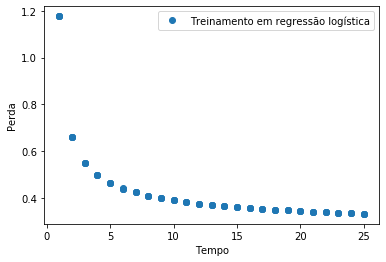

Precisão do modelo: 0.9134


In [44]:
init = tf.global_variables_initializer() # Iniciar as variavés globais. 

with tf.Session() as sess:
    
    sess.run(init)
   
   # Treinamento
    for epoch in range(num_epochs):
        custo_medio = 0.
        tamanho_total = int(mnist.train.num_examples / tamanho)
      
        # Iterar sobre o dataset
        for i in range(tamanho_total):

            xs, ys = mnist.train.next_batch(tamanho)

            # Otimizar os dados
            sess.run(otimizador, feed_dict = {x: xs, y: ys})
            
            # Calcular a perda/custo médio
            custo_medio += sess.run(custo, feed_dict = {x: xs, y: ys}) / tamanho_total

        
        if epoch % passo == 0:
            print("Epoch: {} || Custo: {:.2f}".format(epoch + 1,custo_medio))
            media.append(custo_medio) 
            epochs.append(epoch + 1)

    print("Treinamento encerrado.")
    plt.plot(epochs,media, 'o', label = 'Treinamento em regressão logística') 
    plt.ylabel('Perda') 
    plt.xlabel('Tempo') 
    plt.legend() 
    plt.show() 
    
    # Validando o modelo com os dados de test 
    previsao_correta = tf.equal(tf.argmax(ativa, 1), tf.argmax(y, 1)) 
   
    # Precisão do modelo
    accuracy = tf.reduce_mean(tf.cast(previsao_correta, "float")) 
    print("Precisão do modelo:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))